#Deep Learning Bootcamp - Assignment 1 - Beginners: BankNote

Importing required libraries


In [ ]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Reading the dataset through GitHub


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/training_set_label.csv" )
data.head()

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.612510,0
1,3.2718,1.7837,2.1161,0.613340,0
2,-3.9411,-12.8792,13.0597,-3.312500,1
3,0.5195,-3.2633,3.0895,-0.984900,0
4,2.5698,-4.4076,5.9856,0.078002,0


In [ ]:
data.shape

(1096, 5)

In [ ]:
data.describe()

,VWTI,SWTI,CWTI,EI,Class
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.448500,1.780643,1.493533,-1.157454,0.445255
std,2.852623,5.922621,4.375655,2.084983,0.497221
min,-7.036400,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.790850,-2.125200,-1.574975,-2.246975,0.000000
50%,0.540430,2.205850,0.671900,-0.569190,0.000000
75%,2.835350,6.793925,3.574450,0.399980,1.000000
max,6.563300,12.730200,17.927400,2.449500,1.000000


Creating the matrix of dependant variable

In [ ]:
x = data.drop('Class', axis = 1)
x.head()

,VWTI,SWTI,CWTI,EI
0,2.2634,-4.4862,3.6558,-0.612510
1,3.2718,1.7837,2.1161,0.613340
2,-3.9411,-12.8792,13.0597,-3.312500
3,0.5195,-3.2633,3.0895,-0.984900
4,2.5698,-4.4076,5.9856,0.078002


Creating the matrix of independant variables

In [ ]:
y = data.Class
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Class, dtype: int64

In [ ]:
y.shape

(1096,)

Normalizing the input features between (0,1)

In [ ]:
from sklearn import preprocessing
x_normaized = preprocessing.normalize(x)
x_normaized[:5]

array([[ 0.36248513, -0.71846814,  0.58547899, -0.09809391],
       [ 0.75578484,  0.41203418,  0.48881848,  0.14168136],
       [-0.20687277, -0.6760437 ,  0.68551835, -0.17387685],
       [ 0.1122105 , -0.70486335,  0.66732305, -0.21273555],
       [ 0.32672267, -0.56037934,  0.76100522,  0.00991712]])

Splitting the dataset into test set and training set

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,  y_test = train_test_split(x,y, test_size = 0.2, random_state = 42) 

In [ ]:
x.shape

(1096, 4)

#Model Building

In [ ]:
import numpy
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy.random import seed

Making a sequential model with one hidden layer of 10 neurons and one output layer

In [ ]:
model = Sequential()
model.add(Dense(10, activation = 'relu',input_shape = (x.shape[1], )))
model.add(Dense(1, activation='sigmoid'))


Compiling the model

In [ ]:
# Compiling the model
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)  # Here, we have set our learning rate as 0.001
model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])

Printing model summary

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


#Training the model

Training the model for 50 epochs with batch size of 10

In [ ]:
history = model.fit(x_train, y_train ,epochs=50, batch_size=10, verbose=1, validation_split=0.2)


Epoch 1/50
70/70 [==============================] - 0s 3ms/step - loss: 0.8563 - accuracy: 0.6300 - val_loss: 0.7376 - val_accuracy: 0.6307
Epoch 2/50
70/70 [==============================] - 0s 1ms/step - loss: 0.5567 - accuracy: 0.7457 - val_loss: 0.4767 - val_accuracy: 0.7727
Epoch 3/50
70/70 [==============================] - 0s 1ms/step - loss: 0.3742 - accuracy: 0.8686 - val_loss: 0.3099 - val_accuracy: 0.8750
Epoch 4/50
70/70 [==============================] - 0s 1ms/step - loss: 0.2590 - accuracy: 0.9257 - val_loss: 0.2121 - val_accuracy: 0.9545
Epoch 5/50
70/70 [==============================] - 0s 1ms/step - loss: 0.1888 - accuracy: 0.9700 - val_loss: 0.1508 - val_accuracy: 0.9830
Epoch 6/50
70/70 [==============================] - 0s 1ms/step - loss: 0.1431 - accuracy: 0.9843 - val_loss: 0.1147 - val_accuracy: 0.9830
Epoch 7/50
70/70 [==============================] - 0s 1ms/step - loss: 0.1117 - accuracy: 0.9843 - val_loss: 0.0897 - val_accuracy: 0.9830
Epoch 8/50
70/70 [==

#Model evaluation on test set

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000


[0.0010862600756809115, 1.0]

Visualizing the model's performance

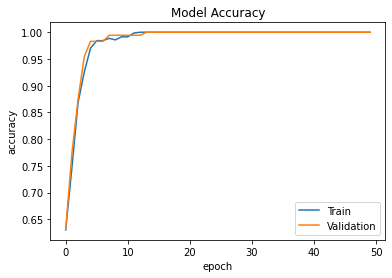

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#Predicting outputs

Reading the test data from GitHub

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/testing_set_label.csv')
test_data.head()

,VWTI,SWTI,CWTI,EI
0,-0.40804,0.54214,-0.52725,0.65860
1,-3.71810,-8.50890,12.36300,-0.95518
2,5.50400,10.36710,-4.41300,-4.02110
3,1.68490,8.74890,-1.26410,-1.38580
4,4.74320,2.10860,0.13680,1.65430


Making and saving the predictions for submission

In [ ]:
test = model.predict(test_data)
predictions = [1 if i >= 0.5 else 0 for i in test]

In [ ]:
predictions

[1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,


In [ ]:
model.predict(x_test)

7/7 [==============================] - 0s 1ms/step - loss: 2.4203e-07 - accuracy: 1.0000


[2.420260614144354e-07, 1.0]